<a href="https://colab.research.google.com/github/michellekituku/Breast-Cancer-LogReg/blob/main/Breast_Cancer_Classification_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Breast Cancer Classification with Logistic Regression**
#### This project trains a Logistic Regression model on the Breast Cancer dataset.
#### It evaluates different regularization strengths (C values) and visualizes results with multiple plots for interpretability.

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

**Load the Breast Cancer dataset**

In [2]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
print("Dataset shape:", cancer_df.shape)
print("Target classes:", cancer.target_names)
print("\nDataset preview:")
print(cancer_df.head())

Dataset shape: (569, 30)
Target classes: ['malignant' 'benign']

Dataset preview:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fr

**Split the dataset into train and test sets**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=42,
    test_size=0.2
)

**Train Logistic Regression model (C=1)**

In [4]:
logreg = LogisticRegression(max_iter=100000, C=1).fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

**Evaluation Metrics**

In [7]:
print("\nEvaluation Metrics (C=1):")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall:    {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.3f}")
print(f"AUC:       {roc_auc_score(y_test, y_prob):.3f}")


Evaluation Metrics (C=1):
Accuracy:  0.965
Precision: 0.959
Recall:    0.986
F1 Score:  0.973
AUC:       0.995


**Confusion Matrix Visualization**

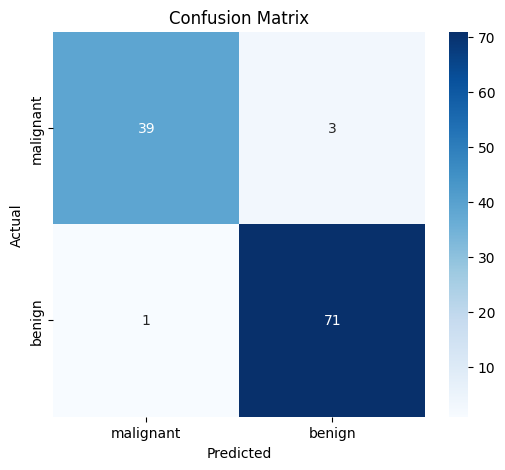

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**ROC Curve Visualization**

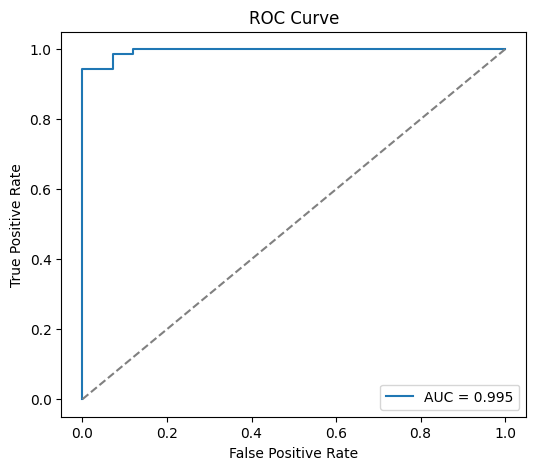

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Effect of Regularization Strengths**

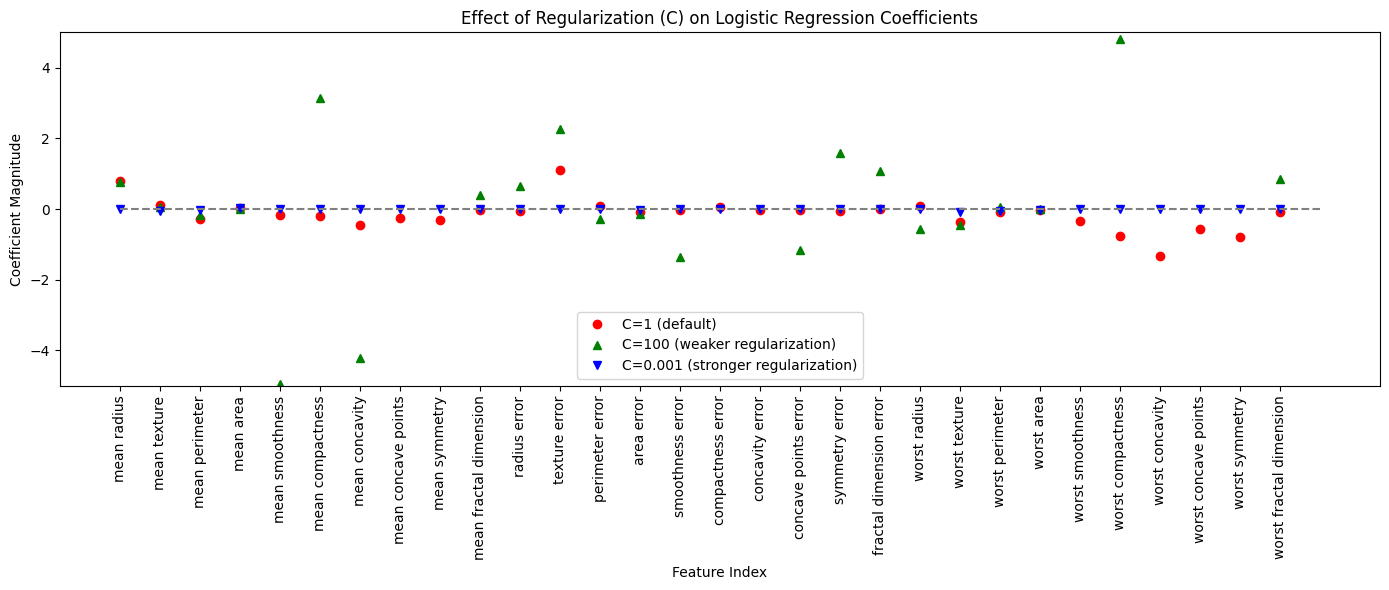

In [10]:
logreg100 = LogisticRegression(C=100, max_iter=100000).fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.001, max_iter=100000).fit(X_train, y_train)

plt.figure(figsize=(14, 6))
plt.plot(logreg.coef_.T, "o", label="C=1 (default)", color="red")
plt.plot(logreg100.coef_.T, "^", label="C=100 (weaker regularization)", color="green")
plt.plot(logreg001.coef_.T, "v", label="C=0.001 (stronger regularization)", color="blue")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1], linestyles="dashed", colors="gray")
plt.ylim(-5, 5)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Effect of Regularization (C) on Logistic Regression Coefficients")
plt.legend()
plt.tight_layout()
plt.show()

**Interpretation of the graph:**

The graph shows how regularization strength (C parameter in Logistic Regression) affects the magnitude of the coefficients assigned to features in the Breast Cancer dataset.

- C = 1 (red circles) is the default setting, balancing bias and variance.

- C = 100 (green triangles) means weaker regularization, so the model allows larger coefficient values. You can see some coefficients shooting up or down (e.g., "mean concavity", "worst area"), indicating the model is relying heavily on those features.

- C = 0.001 (blue triangles) means stronger regularization, which heavily shrinks coefficients toward zero. Most features are very close to zero here, showing that the model is being simplified (less overfitting risk, but potentially underfitting).

Regularization essentially controls model complexity by shrinking coefficients, preventing the model from relying too heavily on any one feature.